### Ví dụ về cách hoạt động của `nn.BatchNorm2d(out_channels)`

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

batch_size = 1000  # Tăng batch_size để có phân phối tốt hơn
out_channels = 16
height, width = 32, 32

# Lớp BatchNorm2d
bn = nn.BatchNorm2d(out_channels)

# Tạo dữ liệu giả với phân phối không đồng đều (phân bố lệch trái, exponential)
x = torch.rand(batch_size, out_channels, height, width) ** 1.5  # Nâng lũy thừa để tạo phân bố lệch

# Áp dụng BatchNorm
output = bn(x)

print(output.shape)


torch.Size([1000, 16, 32, 32])


### Vẽ biểu đồ thể hiện ảnh hưởng của Batch Normalization đến tensor
- tensor là một bộ dữ liệu (ban đầu là phân phối đều) bị biến đổi thành lệch trái

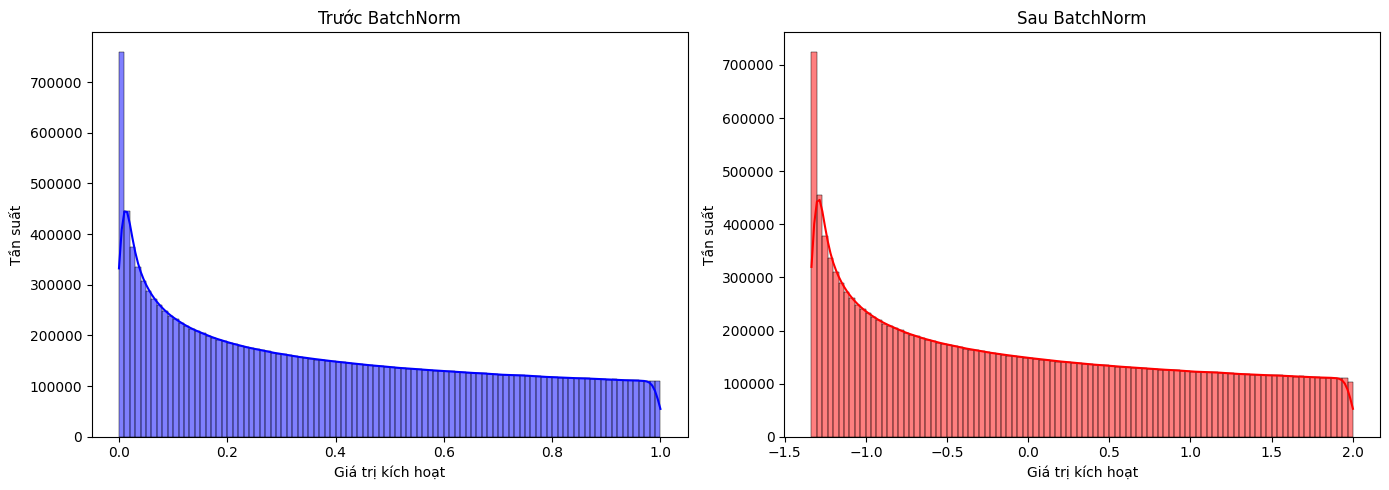

In [22]:
def plot_distribution(ax, data, title, color):
    """Hàm vẽ biểu đồ phân phối của dữ liệu trên subplot"""
    data_flat = data.view(-1).detach().numpy()
    sns.histplot(data_flat, bins=100, kde=True, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Giá trị kích hoạt')
    ax.set_ylabel('Tần suất')

# Tạo figure và subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vẽ biểu đồ trước và sau BatchNorm trên các subplot khác nhau
plot_distribution(axes[0], x, 'Trước BatchNorm', 'blue')
plot_distribution(axes[1], output, 'Sau BatchNorm', 'red')

plt.tight_layout()
plt.show()
